Eksplorasi Data Iris (Custom Dataset)
Dataset Iris adalah salah satu dataset klasik dalam Data Science. Pada notebook ini, kita menggunakan dataset IRIS.csv yang kita miliki sendiri. Dataset ini berisi sampel dari tiga spesies bunga Iris yang memiliki empat fitur utama: panjang kelopak (sepal length), lebar kelopak (sepal width), panjang mahkota (petal length), dan lebar mahkota (petal width).

Tujuan dari notebook ini adalah melakukan Eksplorasi Data (EDA) yang mencakup statistik deskriptif dan visualisasi data.

In [19]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mengatur tema visualisasi
sns.set_theme(style="whitegrid")

# Membaca dataset dari file CSV yang sudah diunggah ke Colab
df_iris = pd.read_csv('IRIS.csv')

# Menampilkan 5 baris pertama dari dataset untuk memastikan data terbaca
display(df_iris.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


1. Data Deskriptif
Di tahap ini, kita akan melihat ringkasan statistik dari data yang kita miliki untuk mengetahui jumlah data, rata-rata, nilai minimum, dan maksimum dari ukuran bunga Iris.

In [20]:
# Melihat informasi umum tentang dataset (tipe data, jumlah baris dan kolom)
print("Informasi Dataset:")
df_iris.info()
print("\n" + "="*50 + "\n")

# Menampilkan statistik deskriptif (mean, standar deviasi, min, max)
print("Statistik Deskriptif:")
display(df_iris.describe())

# Melihat distribusi jumlah untuk setiap spesies bunga
print("\nJumlah Data per Spesies:")
display(df_iris['species'].value_counts())

Informasi Dataset:
<class 'pandas.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    str    
dtypes: float64(4), str(1)
memory usage: 6.0 KB


Statistik Deskriptif:


,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000



Jumlah Data per Spesies:


species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

2. Visualisasi Data
Visualisasi membantu kita untuk melihat pola dan distribusi data dengan lebih jelas menggunakan gambar (grafik).

a. Pairplot (Hubungan Antar Fitur)
Kita menggunakan pairplot untuk melihat hubungan dua dimensi antara fitur-fitur bunga Iris dan membedakannya berdasarkan spesies.

<Figure size 1000x800 with 0 Axes>

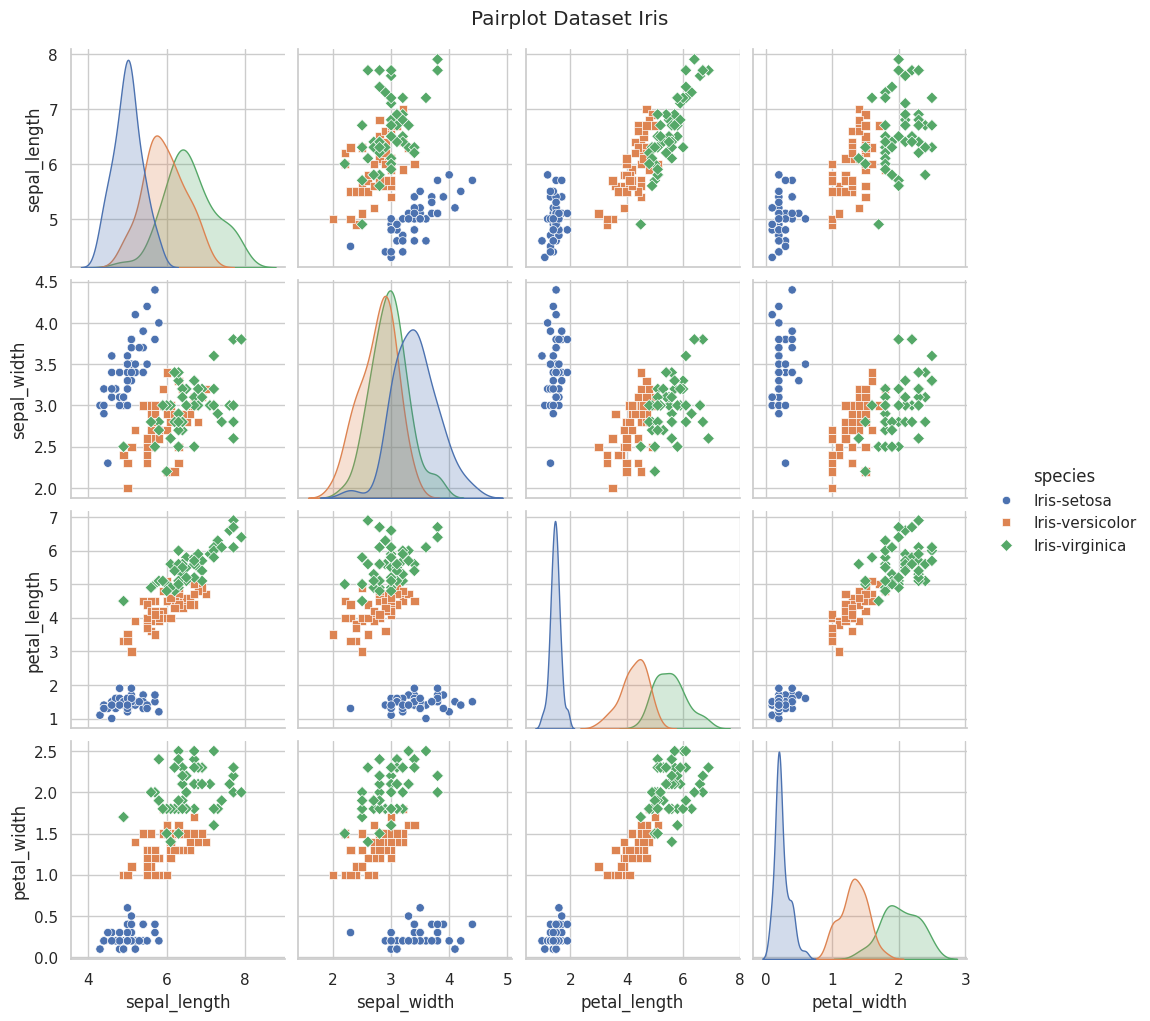

In [21]:
# Membuat pairplot
plt.figure(figsize=(10, 8))
sns.pairplot(df_iris, hue='species', markers=["o", "s", "D"])
plt.suptitle('Pairplot Dataset Iris', y=1.02)
plt.show()

b. Boxplot (Melihat Distribusi dan Deteksi Outlier)
Boxplot digunakan untuk melihat sebaran data secara letak kuartil dan mendeteksi apakah terdapat nilai yang tidak wajar (terlalu besar/kecil) pada kelopak atau mahkota bunga.

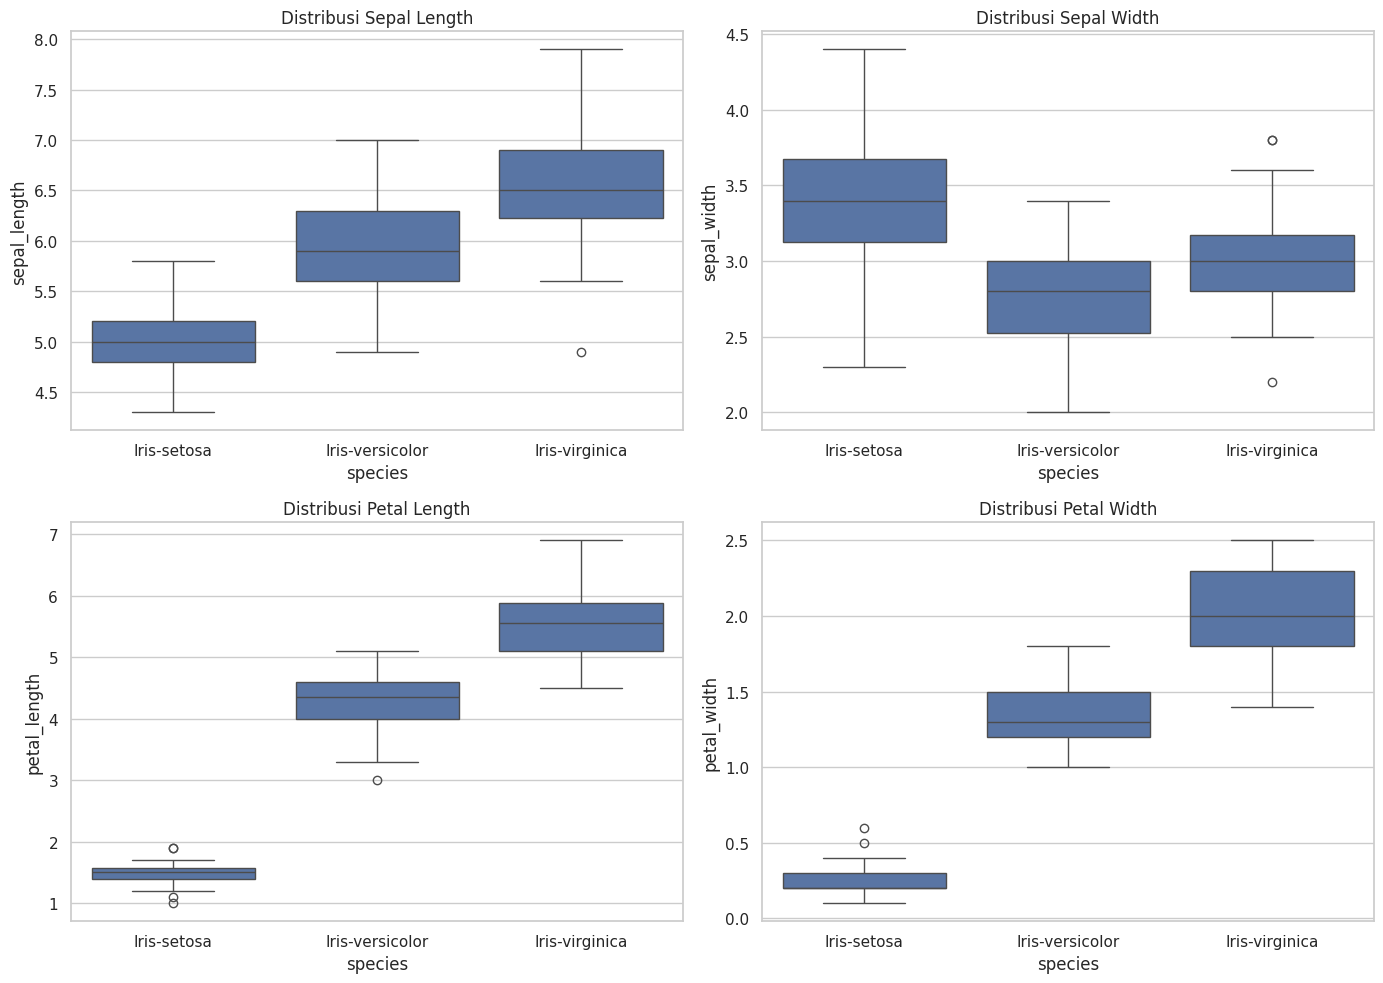

In [22]:
# Menyiapkan area gambar/plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Membuat boxplot untuk masing-masing ukuran
sns.boxplot(ax=axes[0, 0], data=df_iris, x='species', y='sepal_length')
axes[0, 0].set_title('Distribusi Sepal Length')

sns.boxplot(ax=axes[0, 1], data=df_iris, x='species', y='sepal_width')
axes[0, 1].set_title('Distribusi Sepal Width')

sns.boxplot(ax=axes[1, 0], data=df_iris, x='species', y='petal_length')
axes[1, 0].set_title('Distribusi Petal Length')

sns.boxplot(ax=axes[1, 1], data=df_iris, x='species', y='petal_width')
axes[1, 1].set_title('Distribusi Petal Width')

plt.tight_layout()
plt.show()

c. Heatmap Korelasi
Heatmap korelasi menunjukkan seberapa kuat hubungan antar angka ukurannya. Jika ukurannya mendekati angka 1, artinya kedua ukuran tersebut memiliki hubungan yang sangat kuat (misalnya: jika petal length panjang, maka petal width biasanya juga lebar).

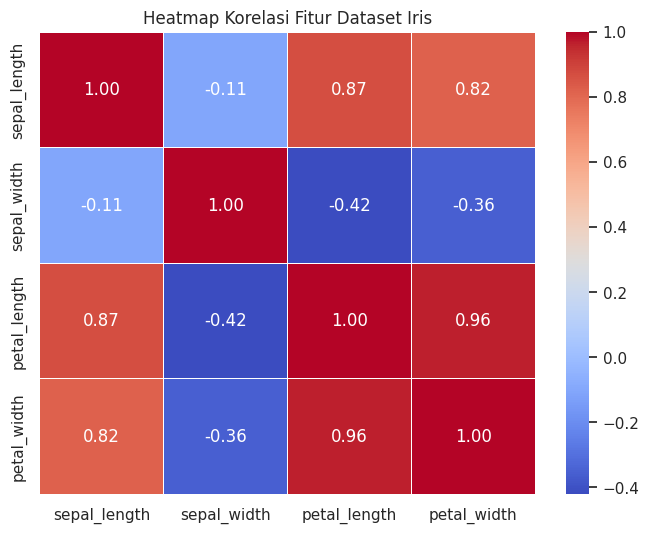

In [23]:
# Menghitung matriks korelasi khusus untuk kolom angka (membuang kolom teks 'species')
correlation_matrix = df_iris.drop('species', axis=1).corr()

# Membuat heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f")
plt.title('Heatmap Korelasi Fitur Dataset Iris')
plt.show()

Perbedaan Utama dengan yang Sebelumnya:
Satu-satunya perbedaan ada di baris pertama blok kode Python. Sebelumnya kita menggunakan sns.load_dataset('iris') yang artinya "mengambil data bawaan dari internet". Sekarang, kita menggunakan pd.read_csv('IRIS.csv') yang artinya "membaca file milik kita sendiri yang bernama IRIS.csv".

In [24]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

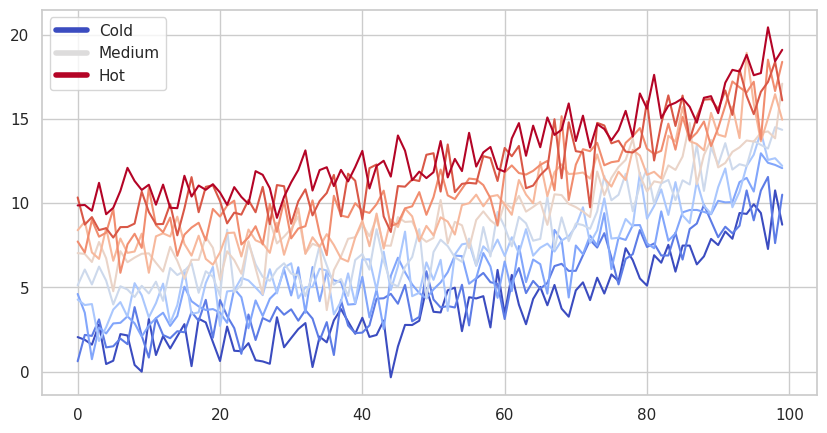

In [25]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);